In [30]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from StatzFunctions import *
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [31]:
stat = 'Strike Rate'
stat2 = 'Economy Rate'
stat_outcome = 'Bad'
stat2_outcome = 'Bad'

In [58]:
# CHANGE THESE
top_right_comment = "The Elite Bowlers,\ndeadly and economical"
bottom_right_comment = "The Leaky Threats,\nthey get wickets but at a cost"
top_left_comment = "The Pressure Builders,\nhard to score off but few wickets"
bottom_left_comment = "The Loose Cannons,\nexpensive and not getting wickets"

In [33]:
df = pd.read_excel(r"C:\Users\George\Documents\Statz.ai\Data\IPL BOWLING w raw data.xlsx", sheet_name="w team badge")

In [34]:
df = df[df['Season'] == 2024]

In [35]:
df = df[df['Wkts'] > 7]

In [36]:
df.rename(columns={'w team badge': 'Team Badge'}, inplace=True)

In [37]:
df = df[['Team','Player','Econ','SR','Team Badge']]

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.rename(columns={'SR': stat, 'Econ': stat2}, inplace=True)

In [40]:
df['Player'] = df['Player'].apply(lambda x: f"{x.split()[0][0]}. {' '.join(x.split()[1:])}")

In [41]:
df_names = df.copy()

In [42]:
if stat_outcome == 'Good':
    buffer = df[stat].max()
else:
    buffer = -df[stat].max()
if stat2_outcome == 'Good':
    buffer2 = df[stat2].max()
else:
    buffer2 = -df[stat2].max()

In [43]:
import urllib.request
def convert_images(df):
    team_badge_path = []
    for i in range(len(df)):
        if '/' in df.iloc[i]['Team']:
            team = df.iloc[i]['Team'].split('/ ')[0] + df.iloc[i]['Team'].split('/ ')[1]
            urllib.request.urlretrieve(df.iloc[i]['Team Badge'], rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{team}.png")
            team_badge_path.append(rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{team}.png")
        else:
            urllib.request.urlretrieve(df.iloc[i]['Team Badge'], rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{df.iloc[i]['Team']}.png")
            team_badge_path.append(rf"C:\Users\George\Documents\Statz.ai\Images\Teams\{df.iloc[i]['Team']}.png")
    df['Team Badge'] = team_badge_path
    return df

In [44]:
df_names = convert_images(df_names)

In [45]:
df_names

,Team,Player,Economy Rate,Strike Rate,Team Badge
0,PBKS,H. Patel,9.73,12.25,C:\Users\George\Documents\Statz.ai\Images\Team...
1,KKR,C. Varun,8.04,14.28,C:\Users\George\Documents\Statz.ai\Images\Team...
2,MI,J. Bumrah,6.48,15.55,C:\Users\George\Documents\Statz.ai\Images\Team...
3,KKR,A. Russell,10.05,9.26,C:\Users\George\Documents\Statz.ai\Images\Team...
4,KKR,H. Rana,9.08,13.31,C:\Users\George\Documents\Statz.ai\Images\Team...
5,SRH,T. Natarajan,9.05,16.21,C:\Users\George\Documents\Statz.ai\Images\Team...
6,PBKS,A. Singh,10.03,15.89,C:\Users\George\Documents\Statz.ai\Images\Team...
7,RR,A. Khan,9.59,17.31,C:\Users\George\Documents\Statz.ai\Images\Team...
8,RR,Y. Chahal,9.41,19.33,C:\Users\George\Documents\Statz.ai\Images\Team...
9,SRH,P. Cummins,9.27,20.33,C:\Users\George\Documents\Statz.ai\Images\Team...


In [46]:
padding1 = ((df_names[stat].max()-df_names[stat].min()) / 50)
padding2 = ((df_names[stat2].max()-df_names[stat2].min()) / 30)

In [47]:
todays_date = pd.to_datetime('today').strftime('%d %B %Y')

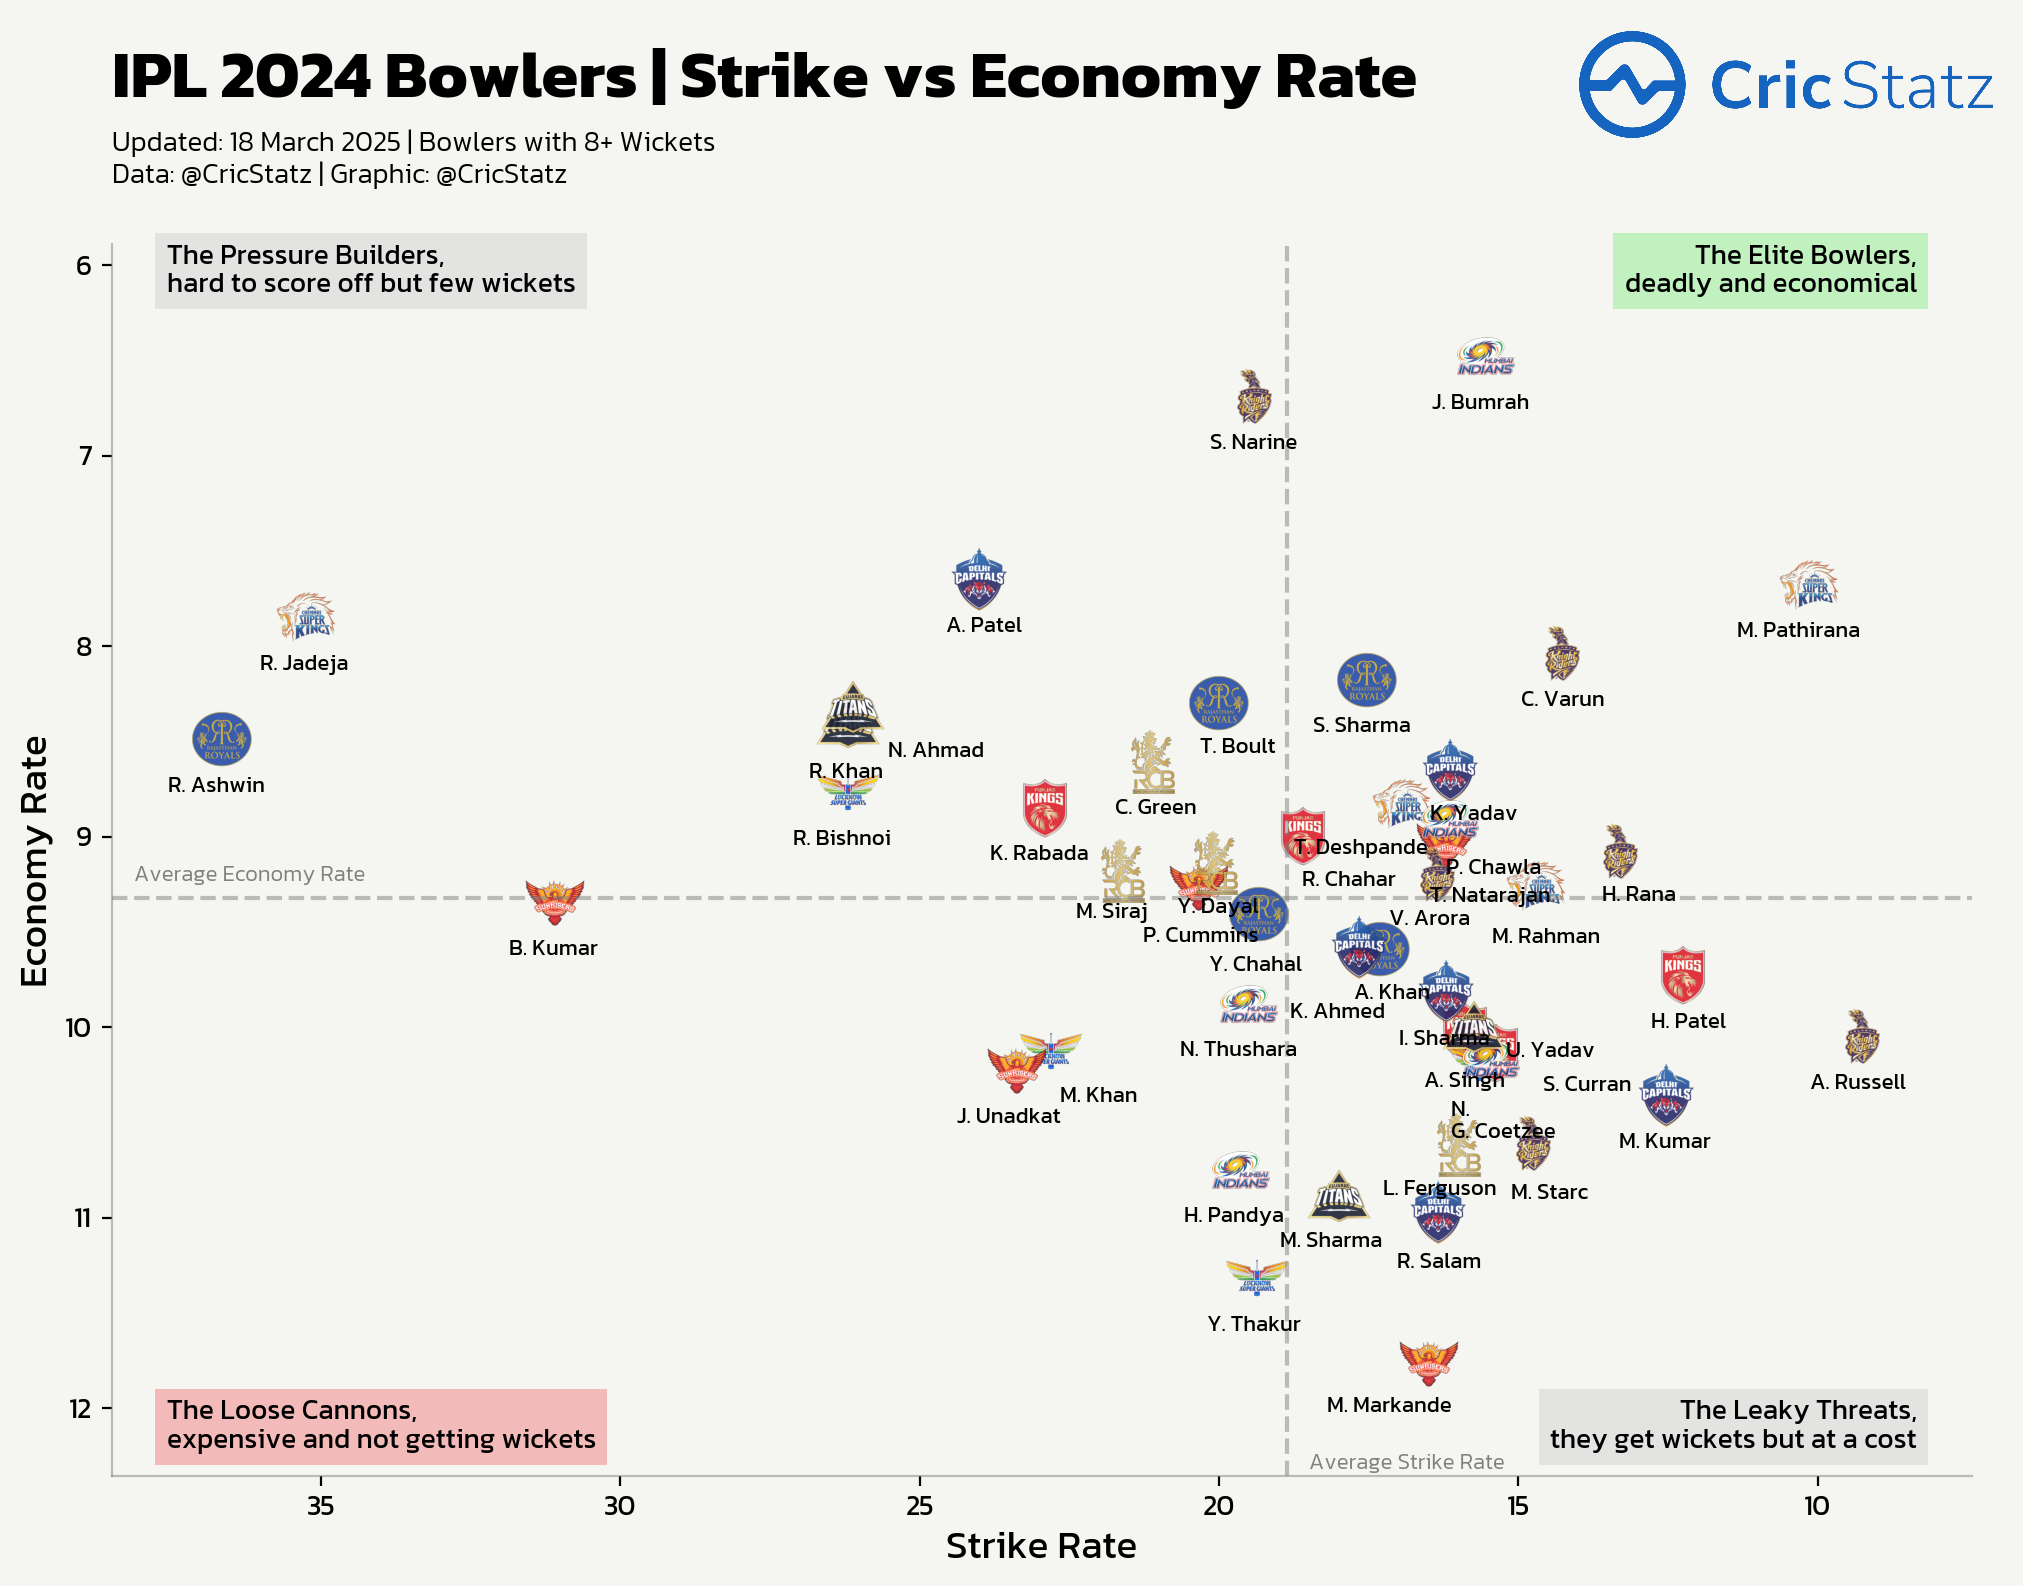

In [59]:
from PIL import Image
from adjustText import adjust_text
import numpy as np

plt.figure(figsize=(12, 8), dpi=200, facecolor='#F5F6F1')  # Set the facecolor to #141514

plt.scatter(df_names[stat], df_names[stat2], color='#F5F6F1', s=0, alpha=1, edgecolor='#F5F6F1', linewidth=0.5)

plt.scatter(df_names[stat], df_names[stat2], color='#F5F6F1', s=0, alpha=1, edgecolor='#F5F6F1', linewidth=0.5)

texts = [plt.text(x, y, text, color='black', fontsize=8, fontproperties = regular, ha = 'center', va = 'bottom') for x, y, text in zip(df_names[stat] - padding1, df_names[stat2] + padding2, df_names['Player'])]

adjust_text(texts, expand = (1.2,1.2))

for i, team in df_names.iterrows():
    badge = plt.imread(team['Team Badge'])
    plt.imshow(np.flipud(np.fliplr(badge)), extent=(team[stat]-padding1, team[stat]+padding1, team[stat2]-padding2, team[stat2]+padding2), aspect='auto', alpha=0.9)
                        
# Add labels and title
plt.ylabel(stat2, fontproperties = regular, size = 14)  # Set the xlabel color to white
plt.xlabel(stat, fontproperties = regular, size = 14)  # Set the ylabel color to white

if stat_outcome == 'Good':
    plt.xlim(df_names[stat].min()-(df_names[stat].max())*0.05, df_names[stat].max()+(df_names[stat].max())*0.07)
else:
    plt.xlim(df_names[stat].max()+(df_names[stat].max())*0.05, df_names[stat].min()-(df_names[stat].max())*0.05)
if stat2_outcome == 'Good':
    plt.ylim(df_names[stat2].min()-(df_names[stat2].max())*0.07, df_names[stat2].max()+(df_names[stat2].max())*0.02)
else:
    plt.ylim(df_names[stat2].max()+(df_names[stat2].max())*0.05, df_names[stat2].min()-(df_names[stat2].max())*0.05)

# Draw a line from the y-axis at the average value
plt.axvline(df_names[stat].mean(), color='grey', linestyle='--', alpha=0.5)
plt.axhline(df_names[stat2].mean(), color='grey', linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

xlim = plt.xlim()
ylim = plt.ylim()

plt.text(xlim[0] + (buffer)*0.01, df_names[stat2].mean() + (buffer2)*0.01, 'Average ' + stat2, color='grey', fontsize=8, ha='left', va='center', fontproperties = light)
plt.text(df_names[stat].mean() + (buffer)*0.01, ylim[0] + (buffer2)*0.01, 'Average ' + stat, color='grey', fontsize=8, ha='left', va='top', fontproperties = light)

# Top Left
plt.text(xlim[0] + buffer*0.025, ylim[1], top_left_comment, 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='left', va='top', fontsize=10, wrap=True, fontproperties = regular)
# Top Right
plt.text(xlim[1] - buffer*0.025, ylim[1], top_right_comment, 
         bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='none'),
         ha='right', va='top', fontsize=10, wrap=True, fontproperties = regular)
# Bottom Left
plt.text(xlim[0] + buffer*0.025, ylim[0] + buffer2*0.01, bottom_left_comment, 
         bbox=dict(facecolor='lightcoral', alpha=0.5, edgecolor='none'),
         ha='left', va='bottom', fontsize=10, wrap=True, fontproperties = regular)
# Bottom Right
plt.text(xlim[1] - buffer*0.025, ylim[0] + buffer2*0.01, bottom_right_comment, 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='right', va='bottom', fontsize=10, wrap=True, fontproperties = regular)

plt.text(0,1.12, f"IPL 2024 Bowlers | Strike vs Economy Rate", ha = 'left',fontsize=24, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0,1.05, f"Updated: {todays_date} | Bowlers with 8+ Wickets\nData: @CricStatz | Graphic: @CricStatz", ha = 'left',fontsize=10, transform=plt.gca().transAxes, fontproperties=light)
#plt.text(0.8,1.05, f"Through match week {gameweek}", ha = 'right',fontsize=18, transform=plt.gca().transAxes, fontproperties=regular, color='grey', alpha=0.5)

# Set the ticks color to white
plt.xticks(fontproperties = regular)
plt.yticks(fontproperties = regular)

# Set the plot background color to #141514
plt.gca().set_facecolor('#F5F6F1')
# Add text box in each quadrant

statz_logo = plt.imread(r"C:\Users\George\Documents\Statz.ai\Images\Logos and Backgrounds\Statz Long Logo Cricket.png")
imagebox = OffsetImage(statz_logo, zoom=0.12)
ab = AnnotationBbox(imagebox, (0.9, 1.13), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")
plt.gca().add_artist(ab)

plt.savefig(
    f"C:/Users/George/Documents/Statz.ai/Visuals/Cricket/{stat} v {stat2}.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()